# Data Science intern @LetsGrowMore

# Author : Anjali Deore

# BEGINNER LEVEL TASK 1

In [2]:
# Load Python libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Data Preparation

I merged 3 datasets (train, songs, members), replaced NAs, created 6 columns (days, months, years of registration_init_time and expiration_date), droped correlating columns.

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
df.shape

(7377418, 6)

In [7]:
df = df.sample(frac=0.1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 96161 to 266177
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735202 non-null  object
 3   source_screen_name  696455 non-null  object
 4   source_type         735588 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


In [9]:
songs = pd.read_csv('songs.csv')

In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [11]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                737742 non-null  object 
 1   song_id             737742 non-null  object 
 2   source_system_tab   735202 non-null  object 
 3   source_screen_name  696455 non-null  object 
 4   source_type         735588 non-null  object 
 5   target              737742 non-null  int64  
 6   song_length         737732 non-null  float64
 7   genre_ids           725709 non-null  object 
 8   artist_name         737732 non-null  object 
 9   composer            569890 non-null  object 
 10  lyricist            419553 non-null  object 
 11  language            737728 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [13]:
members = pd.read_csv('members.csv')


In [14]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       735202 non-null  object 
 3   source_screen_name      696455 non-null  object 
 4   source_type             735588 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737732 non-null  float64
 7   genre_ids               725709 non-null  object 
 8   artist_name             737732 non-null  object 
 9   composer                569890 non-null  object 
 10  lyricist                419553 non-null  object 
 11  language                737728 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [16]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       737742 non-null  object 
 3   source_screen_name      737742 non-null  object 
 4   source_type             737742 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737742 non-null  float64
 7   genre_ids               737742 non-null  object 
 8   artist_name             737742 non-null  object 
 9   composer                737742 non-null  object 
 10  lyricist                737742 non-null  object 
 11  language                737742 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [18]:
 #Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day


In [19]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [20]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [21]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.000015,0.010882,-0.005597,-0.004635,0.001902,0.002698,0.004490,0.003775,0.001539,...,-0.007222,-0.000943,0.005833,0.011156,0.004841,0.012986,0.009973,0.002522,0.009146,0.000942
song_id,-0.000015,1.000000,-0.003656,0.003061,0.006627,-0.004216,-0.011558,0.009796,-0.019154,-0.034009,...,0.001031,-0.001535,-0.000328,-0.001513,-0.000231,0.000135,0.000128,-0.000902,-0.000521,-0.000471
source_system_tab,0.010882,-0.003656,1.000000,-0.029358,-0.077425,0.033701,0.023976,0.036255,0.035089,0.056331,...,-0.024100,0.035405,-0.042589,0.058081,-0.038848,-0.013694,0.007715,0.038401,0.014175,0.009069
source_screen_name,-0.005597,0.003061,-0.029358,1.000000,0.413061,-0.055773,0.022709,-0.017291,0.010596,0.020657,...,0.017796,-0.033945,0.039903,-0.035241,0.038311,0.004958,-0.001949,-0.024414,-0.008049,-0.001030
source_type,-0.004635,0.006627,-0.077425,0.413061,1.000000,-0.124854,0.015066,-0.052198,-0.021039,-0.003748,...,0.022851,-0.027110,0.034701,-0.044387,0.032547,0.007387,0.002705,-0.036381,-0.001306,-0.005145
target,0.001902,-0.004216,0.033701,-0.055773,-0.124854,1.000000,-0.002081,0.017490,0.011373,-0.002581,...,-0.015073,0.008213,-0.002982,0.059150,-0.002214,-0.003401,-0.000641,0.041603,0.012788,0.003757
song_length,0.002698,-0.011558,0.023976,0.022709,0.015066,-0.002081,1.000000,0.031319,0.116315,0.098782,...,0.004799,0.003221,-0.007222,0.006074,-0.007508,0.001854,0.000672,0.003426,0.002942,0.000343
genre_ids,0.004490,0.009796,0.036255,-0.017291,-0.052198,0.017490,0.031319,1.000000,0.202368,0.151910,...,-0.003445,0.005511,-0.003294,0.005795,-0.004258,0.005350,0.001236,0.005463,-0.002577,0.002584
artist_name,0.003775,-0.019154,0.035089,0.010596,-0.021039,0.011373,0.116315,0.202368,1.000000,0.338405,...,0.000345,0.000710,-0.006294,0.008432,-0.006739,0.003261,-0.001099,0.004173,0.005106,-0.000319
composer,0.001539,-0.034009,0.056331,0.020657,-0.003748,-0.002581,0.098782,0.151910,0.338405,1.000000,...,0.001359,0.002419,-0.004484,0.006349,-0.005022,0.004331,-0.001246,0.002978,0.004018,-0.000722


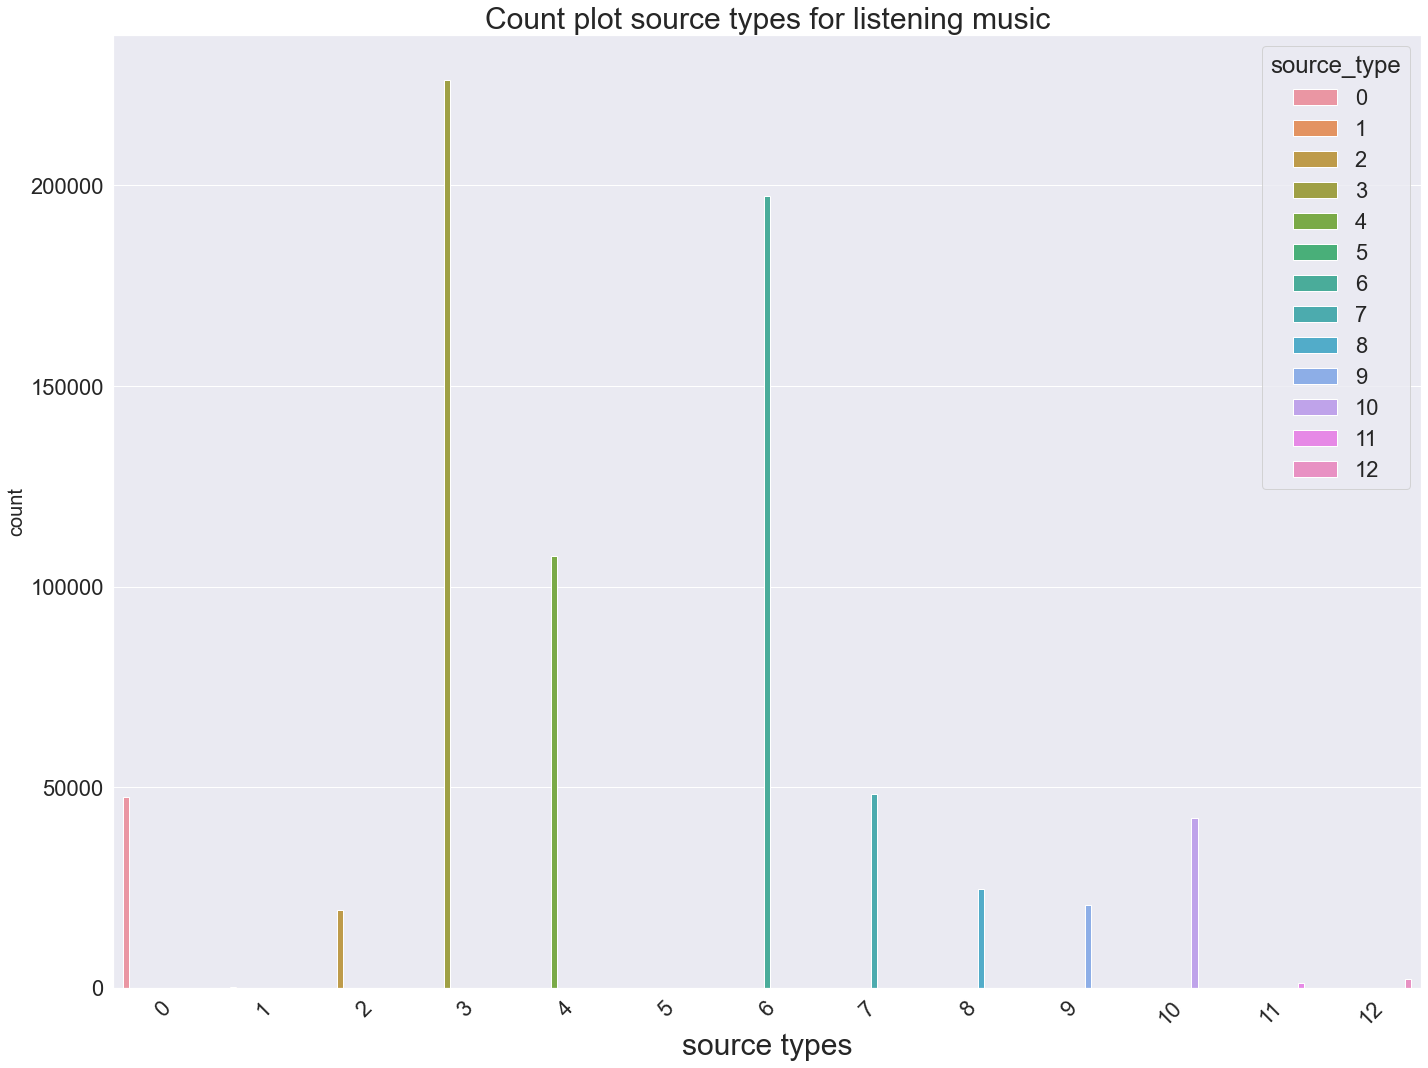

In [24]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

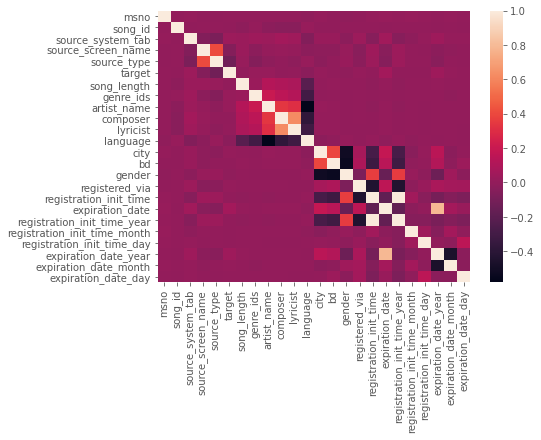

In [20]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

# Random Forest

I selected the most informative columns using Random Forest Model.

In [21]:
# Model with the best estimator
from sklearn.ensemble import RandomForestRegressor
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [22]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [26]:
members = pd.read_csv('members.csv')

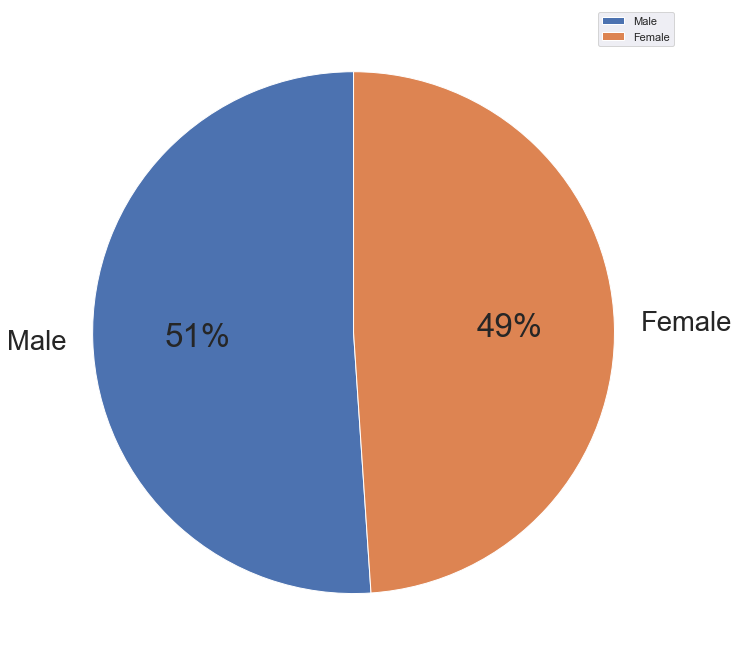

In [28]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 33.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()


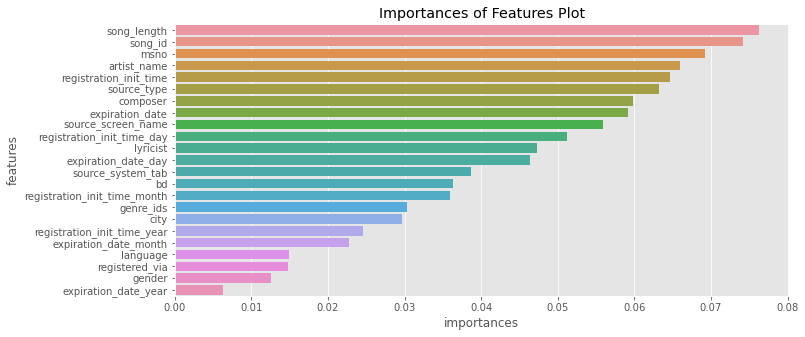

In [23]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [24]:
model.feature_importances_

array([0.0692143 , 0.07417902, 0.03863769, 0.05584892, 0.06319112,
       0.07630149, 0.03034621, 0.06593556, 0.05978918, 0.04730572,
       0.01493382, 0.02963753, 0.03628808, 0.0126333 , 0.01485348,
       0.0646666 , 0.05913182, 0.02457135, 0.03588   , 0.05117307,
       0.00628594, 0.02278646, 0.04640932])

In [25]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [26]:
list(df.columns)

['msno',
 'song_id',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

# XGboost

In [27]:
target = df.pop('target')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

[12:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# The results of the algorithm

In [31]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66    109787
           1       0.67      0.69      0.68    111536

    accuracy                           0.67    221323
   macro avg       0.67      0.67      0.67    221323
weighted avg       0.67      0.67      0.67    221323



In [38]:
members = pd.read_csv('members.csv')


In [39]:
count=0
for i in members["bd"]:
     if i<=50 and i>=10:
        count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50
